In [99]:
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import OneClassSVM
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.cm as cm
import matplotlib.ticker as ticker

from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

In [100]:
#read data - tracks
tracks = pd.read_csv('tracks.csv')
tracks_ = pd.DataFrame(tracks[2:])
#tracks.head()

col_names_lst = list(tracks[:1].values[0])
col_names_lst[0] = "track_id"
names = dict()
for old, new in zip(list(tracks_), col_names_lst):
    names[old] = new
tracks_.rename(columns=names, inplace=True)
tracks_.set_index('track_id', inplace=True)
tracks_ = tracks_.loc[:,~tracks_.columns.duplicated()].copy()

C:\Users\yuval\AppData\Local\Temp\ipykernel_8796\916261527.py:2: DtypeWarning: Columns (0,1,5,6,8,12,18,20,21,22,24,33,34,38,39,44,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  tracks = pd.read_csv('tracks.csv')


In [101]:
#date to int:
from datetime import datetime
l1 = list(tracks_["date_created"])
l2 = list(tracks_["date_released"])
l3 = list(tracks_["active_year_begin"])
l4 = list(tracks_["active_year_end"])
l5 = list(tracks_["date_recorded"])

for i in range(len(l1)):
    if type(l1[i]) == type(""):
        dt_time = datetime.strptime(l1[i], '%Y-%m-%d %H:%M:%S')
        l1[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l2[i]) == type(""):
        dt_time = datetime.strptime(l2[i], '%Y-%m-%d %H:%M:%S')
        l2[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l3[i]) == type(""):
        dt_time = datetime.strptime(l3[i], '%Y-%m-%d %H:%M:%S')
        l3[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l4[i]) == type(""):
        dt_time = datetime.strptime(l4[i], '%Y-%m-%d %H:%M:%S')
        l4[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
    if type(l5[i]) == type(""):
        dt_time = datetime.strptime(l5[i], '%Y-%m-%d %H:%M:%S')
        l5[i] = 10**4*dt_time.year + 10**2*dt_time.month + dt_time.day
        
tracks_["date_created"] = l1
tracks_["date_released"] = l2
tracks_["active_year_begin"] = l3
tracks_["active_year_end"] = l4
tracks_["date_recorded"] = l5

In [102]:
#delete rows without a ground truth (genre)
l = list(pd.read_csv('genres.csv')["title"])

delete = []

for indx in tracks_.index.values.tolist():
    row = tracks_.loc[indx]
    if row["genre_top"] not in l:
        delete.append(indx)
tracks_.drop(delete, inplace = True)
x = 1

In [103]:
tracks_ = tracks_.drop(["latitude","longitude","engineer", "date_recorded", "title", "information", "tags", "producer", "type", "associated_labels", "active_year_begin", "bio", "location", "members", "name", "related_projects", "website", "wikipedia_page", "split", "subset", "composer", "genres", "genres_all", "language_code", "license", "lyricist", "publisher", "active_year_end"], axis=1).drop_duplicates(keep='first')

In [104]:
cols = list(tracks_.columns)
a, b = cols.index('genre_top'), cols.index('number')
cols[b], cols[a] = cols[a], cols[b]
tracks_ = tracks_[cols]

In [105]:
def get_number_by_genre(genre):
    genres = [
        'Blues',
        'Classical',
        'Country',
        'Easy Listening',
        'Electronic',
        'Experimental',
        'Folk',
        'Hip-Hop',
        'Instrumental',
        'International',
        'Jazz',
        'Old-Time / Historic',
        'Pop',
        'Rock',
        'Soul-RnB',
        'Spoken',
        ]
    return genres.index(genre)+1

tracks_ = tracks_.dropna()
Y = pd.DataFrame(columns=['Label'])
Y[['Label']] = tracks_[['genre_top']]
X = tracks_.drop('genre_top', axis=1)
Y = [get_number_by_genre(genre) for genre in Y['Label']]
np.unique(Y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [106]:
l = 4000
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42, test_size=0.25, shuffle=True)
X_train.fillna(X_train.mean())
X_test.shape

C:\Users\yuval\AppData\Local\Temp\ipykernel_8796\1569167404.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.fillna(X_train.mean())


(8378, 11)

In [107]:
km_sse_score=[]
gmm_sse_score =[]
hac_sse_score=[]
for k in range (2,17):
    # K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    clusters_km = kmeans.predict(X_train)
    km_sse_score.append(kmeans.inertia_/10000000)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

# ######################################################

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X[:20000], Y[:20000], test_size=0.25, random_state=42)

## Clustering

In [80]:
'''import matplotlib.pyplot as plt
import numpy as np

# Create random data
np.random.seed(42)
# Calculate SSE for KMeans, MiniBatchKMeans, and KMedoids clustering algorithms
sse_score_km = []
sse_score_mbkm = []
sse_score_kmed = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    kmeans.predict(X_train)
    sse_score_km.append(kmeans.inertia_)

    mbkm = MiniBatchKMeans(n_clusters=k, n_init="auto").fit(X_train)
    mbkm.predict(X_train)
    sse_score_mbkm.append(mbkm.inertia_)

    kmed = KMedoids(n_clusters=k).fit(X_train)
    kmed.predict(X_train)
    sse_score_kmed.append(kmed.inertia_)

# Define the RdYlBd colormap
colormap = plt.cm.RdYlBu_r

# Plot SSE scores for KMeans, MiniBatchKMeans, and KMedoids clustering algorithms
plt.figure(figsize=(8, 6))

plt.plot(range(1, 15), sse_score_km, c=colormap(0.9), zorder=3, label="K means")
plt.plot(range(1, 15), sse_score_mbkm, c=colormap(0.1), zorder=3, label="Mini batch K means")
plt.plot(range(1, 15), sse_score_kmed, c=colormap(0.7), zorder=3, label="K medoids")


# Add a black dashed line at x=6
plt.axvline(x=8, linestyle='--', color='black', label="Optimal number of cluster")

plt.xlabel('Number of clusters')
plt.ylabel('Loss (SSE score)')
plt.legend()

# Save the plot as a PNG image
plt.savefig('sse_scores.png', dpi=300)

plt.show()
'''

'import matplotlib.pyplot as plt\nimport numpy as np\n\n# Create random data\nnp.random.seed(42)\n# Calculate SSE for KMeans, MiniBatchKMeans, and KMedoids clustering algorithms\nsse_score_km = []\nsse_score_mbkm = []\nsse_score_kmed = []\n\nfor k in range(1, 15):\n    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)\n    kmeans.predict(X_train)\n    sse_score_km.append(kmeans.inertia_)\n\n    mbkm = MiniBatchKMeans(n_clusters=k, n_init="auto").fit(X_train)\n    mbkm.predict(X_train)\n    sse_score_mbkm.append(mbkm.inertia_)\n\n    kmed = KMedoids(n_clusters=k).fit(X_train)\n    kmed.predict(X_train)\n    sse_score_kmed.append(kmed.inertia_)\n\n# Define the RdYlBd colormap\ncolormap = plt.cm.RdYlBu_r\n\n# Plot SSE scores for KMeans, MiniBatchKMeans, and KMedoids clustering algorithms\nplt.figure(figsize=(8, 6))\n\nplt.plot(range(1, 15), sse_score_km, c=colormap(0.9), zorder=3, label="K means")\nplt.plot(range(1, 15), sse_score_mbkm, c=colormap(0.1), zorder=3, 

In [81]:
X_train.shape

(15000, 11)

In [82]:
'''tsne =PCA(2)
tsne_emb_train = tsne.fit_transform(X_train)
tsne_emb_test = tsne.fit_transform(X_test)
'''


'tsne =PCA(2)\ntsne_emb_train = tsne.fit_transform(X_train)\ntsne_emb_test = tsne.fit_transform(X_test)\n'

In [83]:
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

In [84]:
k=8

In [85]:
#KMEANS
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
clusters_km = kmeans.predict(X_train)

In [86]:
#minibatch k means
mbkm = MiniBatchKMeans(n_clusters=k).fit(X_train)
clusters_mbkm = mbkm.predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_train)

In [88]:
#GMM
gmm = GaussianMixture(n_components=k)
gmm.fit(X_train)
clusters_gmm = gmm.predict(X_train)

In [89]:
hierarchical_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
clusters_hier = hierarchical_clustering.fit_predict(X_train)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [90]:
X_train.shape

(15000, 11)

In [91]:
predicted_clusters = [[int(x) for x in hierarchical_clustering.fit_predict(X_test)],
                     [int(x) for x in kmedoids.predict(X_test)],
                      [int(x) for x in kmeans.predict(X_test)],
                      [int(x) for x in mbkm.predict(X_test)]]
methods = ["Heirarchical clustering", "K medoids", "K means", "Minibatch K means"]




C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Statistical Tests

In [92]:
len(y_test)

5000

In [93]:
#mutual information
from sklearn.metrics import mutual_info_score

def calculate_mi_on_groups(cluster, labels, r, g):
    mi = []
    for i in range(0,r): 
        clusters_group = cluster[i*g: (i+1)*g]
        labels_group = labels[i*g: (i+1)*g]
        mi.append(mutual_info_score(clusters_group, labels_group))
    return mi  

In [94]:

labels_list_train = y_train
labels_list_test = y_test

mutual_informations = []
for method_, cluster_ in zip(methods, predicted_clusters):
    mutual_informations.append(calculate_mi_on_groups(cluster_, y_test, 50, 100))
    print(f"mutual information between {method_} and the ground truth is {np.mean(calculate_mi_on_groups(cluster_, y_test, 50, 100))}")

mutual information between Heirarchical clustering and the ground truth is 0.3770152776493563
mutual information between K medoids and the ground truth is 0.4571062628180671
mutual information between K means and the ground truth is 0.4115828626965893
mutual information between Minibatch K means and the ground truth is 0.3999317157514804


mutual information between Heirarchical clustering and the ground truth is 0.3770152776493563
mutual information between K medoids and the ground truth is 0.4571062628180671
mutual information between K means and the ground truth is 0.4115828626965893
mutual information between Minibatch K means and the ground truth is 0.3999317157514804


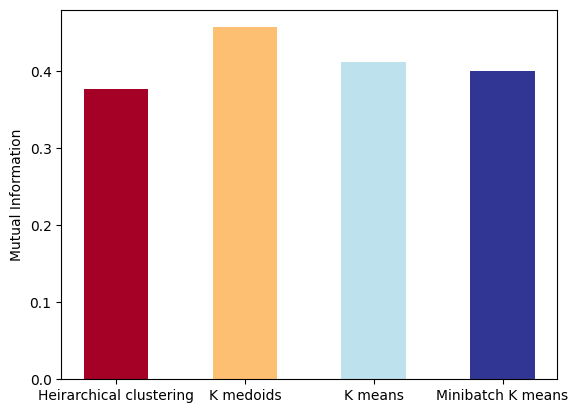

In [95]:
import matplotlib.pyplot as plt
import numpy as np

#Define the colormap
cmap = plt.get_cmap('RdYlBu')

labels_list_train = y_train
labels_list_test = y_test

mutual_informations = []
labels = []
for method_, cluster_ in zip(methods, predicted_clusters):
    mi = calculate_mi_on_groups(cluster_, y_test, 50, 100)
    mutual_informations.append(np.mean(mi))
    labels.append(method_)
    print(f"mutual information between {method_} and the ground truth is {np.mean(mi)}")

#Plot the bar graph
fig, ax = plt.subplots()
bars = ax.bar(labels, mutual_informations, width=0.5, color=cmap(np.linspace(0, 1, len(mutual_informations))))

#Add labels and title
ax.set_ylabel('Mutual Information')
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
plt.savefig('mutual_information_plot_music.png', dpi=300, bbox_inches='tight')

plt.show()

In [96]:
import pickle


with open('methods_music.pkl', 'wb') as f:
    pickle.dump(methods, f)

with open('mutual_informations_music.pkl', 'wb') as f:
    pickle.dump(mutual_informations, f)


In [502]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_informations)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

t-statistic = 13.40, p-value = 5.41e-08 = 0.00000


In [503]:
from scipy.stats import ttest_ind

dueos = [(0,1), (1,2), (1,3)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])

    # print the result
    print(f"t test between {methods[i]} and {methods[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")


t test between Heirarchical clustering and K medoids
t-statistic = -5.92, p-value = 4.70e-08 = 0.00000
 
t test between K medoids and K means
t-statistic = 3.25, p-value = 1.57e-03 = 0.00157
 
t test between K medoids and Minibatch K means
t-statistic = 4.59, p-value = 1.33e-05 = 0.00001
 


## Annomaly detection

In [504]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [505]:
#LOF
lof = LocalOutlierFactor(n_neighbors=50, contamination=0.01)
y_pred_lof = lof.fit_predict(X_train)
y_pred_lof
y_pred_lof_test = lof.fit_predict(X_test)

In [506]:
#Isolation Forest
isolation_forest = IsolationForest(n_estimators=500, contamination=0.01)
y_pred_if = isolation_forest.fit_predict(X_train)
y_pred_if
y_pred_if_test = isolation_forest.fit_predict(X_test)

C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\yuval\anaconda3\envs\APPLIED_MACHINE_LEARING\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [507]:
#One-Class SVM
one_class_svm = OneClassSVM(kernel='rbf', nu=0.01)
one_class_svm.fit(X_train)
y_pred_ocsvm = one_class_svm.predict(X_train)
y_pred_ocsvm
y_pred_ocsvm_test = one_class_svm.predict(X_test)

In [508]:
# Print the number of anomalies
print("LOF detected", np.sum(y_pred_lof == -1), "anomalies")
print("LOF detected on the test set", np.sum(y_pred_lof_test == -1), "anomalies")
print("Isolation Forest detected", np.sum(y_pred_if == -1), "anomalies")
print("Isolation Forest detected on the test set", np.sum(y_pred_if_test == -1), "anomalies")
print("One-Class SVM detected", np.sum(y_pred_ocsvm == -1), "anomalies")
print("One-Class SVM detected on the test set", np.sum(y_pred_ocsvm_test == -1), "anomalies")

LOF detected 150 anomalies
LOF detected on the test set 50 anomalies
Isolation Forest detected 150 anomalies
Isolation Forest detected on the test set 50 anomalies
One-Class SVM detected 132 anomalies
One-Class SVM detected on the test set 38 anomalies


In [2]:
mutual_information_ad = []
methods_ad = [(y_pred_lof, y_pred_lof_test), (y_pred_if,y_pred_if_test), (y_pred_ocsvm,y_pred_ocsvm_test)]
names = ["LOF", "Isolation Forest", "One Class SVM"]

for i, anom, name, rg in zip(range(1,4), methods_ad, names, [(30, 165), (30, 165), (34, 146)]):
    X_train_clean = X_train[anom[0] != -1]
    X_test_clean = X_test[anom[1] != -1]
    kmedoids = KMedoids(n_clusters=k, metric='euclidean').fit(X_train_clean)
    clusters_kmedoids = kmedoids.predict(X_test_clean)
    
    mutual_information_ad.append(calculate_mi_on_groups(clusters_kmedoids, np.array(y_test)[anom[1] != -1], rg[0], rg[1]))
plt.show()


KeyboardInterrupt



In [511]:
for name, score in zip(names, mutual_information_ad):
    print(f"mutual information between {name} and the ground truth is {np.mean(score)}")

mutual information between LOF and the ground truth is 0.37367807904783096
mutual information between Isolation Forest and the ground truth is 0.36874079722815795
mutual information between One Class SVM and the ground truth is 0.38974253848580753


In [512]:
#Anova test
from scipy.stats import f_oneway
# perform ANOVA test
t_statistic, p_value = f_oneway(*mutual_information_ad)

print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))

t-statistic = 1.28, p-value = 2.82e-01 = 0.28178


In [513]:
from scipy.stats import ttest_ind

dueos = [(0,2), (0,1), (1,2)]
for i, j in dueos:
    # perform t-test
    t_statistic, p_value = ttest_ind(mutual_informations[i], mutual_informations[j])

    # print the result
    print(f"t test between {names[i]} and {names[j]}")
    print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))
    print(" ")

t test between LOF and One Class SVM
t-statistic = -2.69, p-value = 8.45e-03 = 0.00845
 
t test between LOF and Isolation Forest
t-statistic = -5.92, p-value = 4.70e-08 = 0.00000
 
t test between Isolation Forest and One Class SVM
t-statistic = 3.25, p-value = 1.57e-03 = 0.00157
 


**no one better AD method**

### Check if there is an improvment in the clustering with LOF


In [514]:
#train the with AD model
X_test_clean = X_test[y_pred_if_test != -1]
kmedoids_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_ad.fit(X_train)
clusters_ad = kmedoids.predict(X_test_clean)

count = 0
clusters_with_anomalys = []
for i in range(0, len(X_test)):
    if y_pred_if_test[i] == -1:
        clusters_with_anomalys.append(-1)
        count+=1
    else:
        clusters_with_anomalys.append(clusters_ad[i-count])
    
print(f"mutual information between WITH AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_with_anomalys, y_test, 50, 100))}")

#train the no AD model
kmedoids_no_ad = KMedoids(n_clusters=k, metric='euclidean')
kmedoids_no_ad.fit(X_train)
clusters_no_ad = kmedoids.predict(X_test)

print(f"mutual information between NO AD and the ground truth is {np.mean(calculate_mi_on_groups(clusters_no_ad, y_test, 50, 100))}")


mutual information between WITH AD and the ground truth is 0.48068400957474644
mutual information between NO AD and the ground truth is 0.4571062628180671


In [515]:
from scipy.stats import ttest_ind

# perform t-test
t_statistic, p_value = ttest_ind(calculate_mi_on_groups(clusters_with_anomalys, labels_list_test, 50, 100), calculate_mi_on_groups(clusters_no_ad, labels_list_test, 50, 100))

# print the result
print(f"t test between WITH AD and NO AD")
print("t-statistic = {:.2f}, p-value = {:.2e} = {:.5f}".format(t_statistic, p_value, p_value))


t test between WITH AD and NO AD
t-statistic = 1.57, p-value = 1.19e-01 = 0.11914


(5000, 2)


C:\Users\yuval\AppData\Local\Temp\ipykernel_7416\3138037178.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))
C:\Users\yuval\AppData\Local\Temp\ipykernel_7416\3138037178.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, format='')


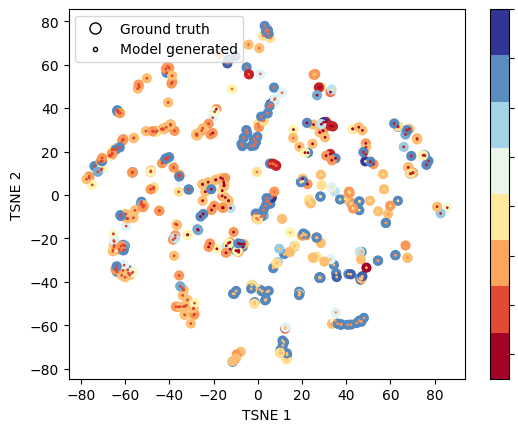

In [516]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

tsne = TSNE(n_components=2)
X_test_tsne = tsne.fit_transform(X_test)
print(X_test_tsne.shape)

cmap = "RdYlBu"
l = 500
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=[int(x) for x in list(y_test[0:l])], cmap=cmap, norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=clusters_kmedoids[0:l], cmap=cmap, norm=normalize, s=1, label='Model generated')

# Get the unique colors used in the plot
unique_colors = np.unique(clusters_kmedoids[0:l])

# Create a new color map using only the unique colors
new_cmap = plt.cm.get_cmap(cmap, len(unique_colors))

# Plot the color bar using the new color map
sm = plt.cm.ScalarMappable(cmap=new_cmap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, format='')

# Create empty proxy artists for the legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Ground truth', markerfacecolor='none', markersize=8, markeredgecolor='k'),
                   Line2D([0], [0], marker='o', color='w', label='Model generated', markerfacecolor='none', markersize=3, markeredgecolor='k')]

# Add legend with labels and no fill color
plt.legend(handles=legend_elements, loc='upper left')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.savefig(f'music_resualts_plot_{cmap}_last.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [98]:
import pickle

# Assuming you have your lists defined: X_train, X_test, y_test

# Save X_train
with open('X_train_music.pkl', 'wb') as f:
    pickle.dump(X_train, f)

# Save X_test
with open('X_test_music.pkl', 'wb') as f:
    pickle.dump(X_test, f)

# Save y_test
with open('y_test_music.pkl', 'wb') as f:
    pickle.dump(y_test, f)


(5000, 2)


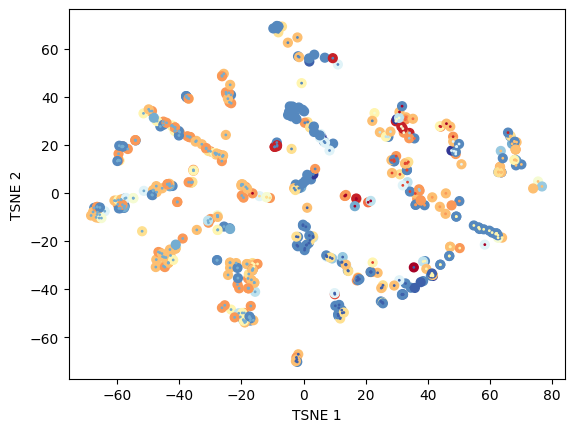

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#KMedoids
kmedoids = KMedoids(n_clusters=k, metric='euclidean')
kmedoids.fit(X_train)
clusters_kmedoids = kmedoids.predict(X_test)

tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=1000)
X_test_tsne = tsne.fit_transform(X_test)
print(X_test_tsne.shape)

cmap = "RdYlBu"
l = 500
normalize = plt.Normalize(vmin=np.min(y_test), vmax=np.max(y_test))

# Plot the data points with labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=[int(x) for x in list(y_test[0:l])], cmap=cmap, norm=normalize, s=40, label='Ground truth')

# Plot the data points with cluster labels
plt.scatter(X_test_tsne[:, 0][0:l], X_test_tsne[:, 1][0:l], c=clusters_kmedoids[0:l], cmap=cmap, norm=normalize, s=1, label='Model generated')

# Add labels and title
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

plt.show()


In [111]:
with open('X_test_tsne_music.pkl', 'wb') as f:
    pickle.dump(X_test_tsne, f)